## **Import packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

## **Get dataset**

In [2]:
path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(path)

In [3]:
df = pd.read_csv(path) # Read csv
df.head() # Display the first-five rows

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df = df[5::6] # Display the hourly data
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S') # Convert to datetime
df = df.drop(columns=['Date Time']) # Drop datetime column
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<Axes: xlabel='Date Time'>

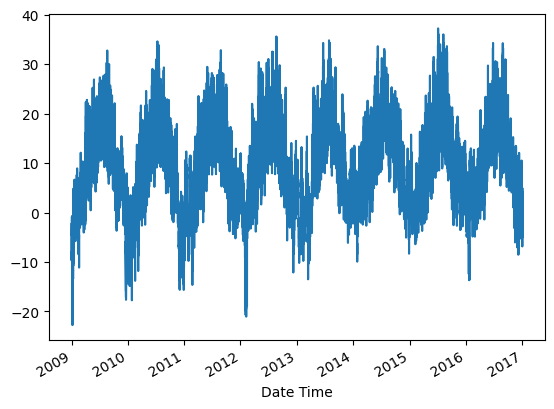

In [6]:
df['T (degC)'].plot() # Plot of the temperature column

In [7]:
df.isna().sum()

,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0
H2OC (mmol/mol),0


## **Function to create sliding window**

In [8]:
def df_to_x_y(df, window_size=1):
  df_to_np = df.values # Convert dataframe to numpy array

  x = [] # Initialise empty list for input
  y = [] # Initialise empty list for label

  # Create sliding window
  for i in range(len(df_to_np) - window_size):
    input = [[a] for a in df_to_np[i:i+window_size]] # Window of data (input features)
    label = df_to_np[i+window_size] # Next value after window (label)
    x.append(input)
    y.append(label)

  return np.array(x), np.array(y)  # Convert to numPy arrays

In [9]:
window_size = 5
x, y = df_to_x_y(df['T (degC)'], window_size) # Call the function to get x and y
x.shape, y.shape

((70086, 5, 1), (70086,))

## **Split data into training, validation and testing**

In [10]:
train_size = int(len(x) * .8) # 80% of data for training
p_90 = int(len(x) * .9) # 90% of data

x_train, y_train = x[:train_size], y[:train_size] # Training data
x_val, y_val = x[train_size:p_90], y[train_size:p_90] # Validation data
x_test, y_test = x[p_90:], y[p_90:] # Testing data

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((56068, 5, 1), (56068,), (7009, 5, 1), (7009,), (7009, 5, 1), (7009,))

## **Model development (CNN)**

In [11]:
model_cnn = Sequential() # Initialize the sequential model
model_cnn.add(InputLayer((5, 1))) # Input layer
model_cnn.add(Conv1D(64, kernel_size=2, activation='relu')) # Convolution layer
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu')) # First Hidden layer
model_cnn.add(Dense(8, activation='relu')) # Second Hidden layer
model_cnn.add(Dense(1)) # Output layer
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,689 (33.94 KB)

 Trainable params: 8,689 (33.94 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
checkpoint = ModelCheckpoint('model_cnn.keras', save_best_only=True, monitor='val_loss', mode='min') # Save best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stopping checkpoint

model_cnn.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) # Model compilation for CNN

history_cnn = model_cnn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[checkpoint, early_stopping]) # Model training

Epoch 1/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 27.0803 - root_mean_squared_error: 4.7276 - val_loss: 0.7133 - val_root_mean_squared_error: 0.8446
Epoch 2/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7279 - root_mean_squared_error: 0.8531 - val_loss: 0.7221 - val_root_mean_squared_error: 0.8497
Epoch 3/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6502 - root_mean_squared_error: 0.8062 - val_loss: 0.6850 - val_root_mean_squared_error: 0.8276
Epoch 4/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6657 - root_mean_squared_error: 0.8158 - val_loss: 0.6853 - val_root_mean_squared_error: 0.8278
Epoch 5/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6554 - root_mean_squared_error: 0.8094 - val_loss: 0.6449 - val_root_mean_squared_error: 0.8030
Epoch 6/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6531 - root_mean_squared_error: 0.8080 - val_loss: 0.6147 - val_root_mean_squared_error: 0.7840
Epoch 7/50
1753/1753 ━━━━━━━━━━━━━━━━━━

## **Model Development (GRU)**

In [13]:
model_gru = Sequential() # Initialize the sequential model
model_gru.add(InputLayer((5, 1))) # Input layer
model_gru.add(GRU(64)) # GRU layer
model_gru.add(Dense(32, activation='relu')) # First Hidden layer
model_gru.add(Dense(8, activation='relu')) # Second Hidden layer
model_gru.add(Dense(1)) # Output layer
model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,217 (59.44 KB)

 Trainable params: 15,217 (59.44 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_gru.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) # Model compilation for GRU

history_gru = model_gru.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[checkpoint, early_stopping]) # Model training

Epoch 1/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 66.4235 - root_mean_squared_error: 7.8621 - val_loss: 1.6793 - val_root_mean_squared_error: 1.2959
Epoch 2/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.9006 - root_mean_squared_error: 0.9486 - val_loss: 0.8523 - val_root_mean_squared_error: 0.9232
Epoch 3/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6943 - root_mean_squared_error: 0.8332 - val_loss: 0.7190 - val_root_mean_squared_error: 0.8480
Epoch 4/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6625 - root_mean_squared_error: 0.8138 - val_loss: 0.6866 - val_root_mean_squared_error: 0.8286
Epoch 5/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.6486 - root_mean_squared_error: 0.8053 - val_loss: 0.6488 - val_root_mean_squared_error: 0.8055


## **Create a function for train, validation and test plots**

In [15]:
def plot_predictions(model, x, y, ax, start, stop):
  y_pred = model.predict(x).flatten() # Make predictions

  df = pd.DataFrame(data={'Predictions': y_pred, 'Actuals': y}) # Create dataframe of predictions and actual label

  ax.plot(df.Predictions[start:stop], label='Predictions') # Plot predictions
  ax.plot(df.Actuals[start:stop], label='Actuals') # Plot actuals

  ax.set_title(('CNN' if model == model_cnn else 'GRU') + " Predictions vs Actual") # Title
  ax.set_xlabel("Number of Periods") # X-label
  ax.set_ylabel("Values") # Y-label
  ax.grid(True) # Display grid
  ax.legend() # Display legend

  return df, mse(y, y_pred), mae(y, y_pred) # Return the dataframe, means_quared_error and mean_absolute_error

1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


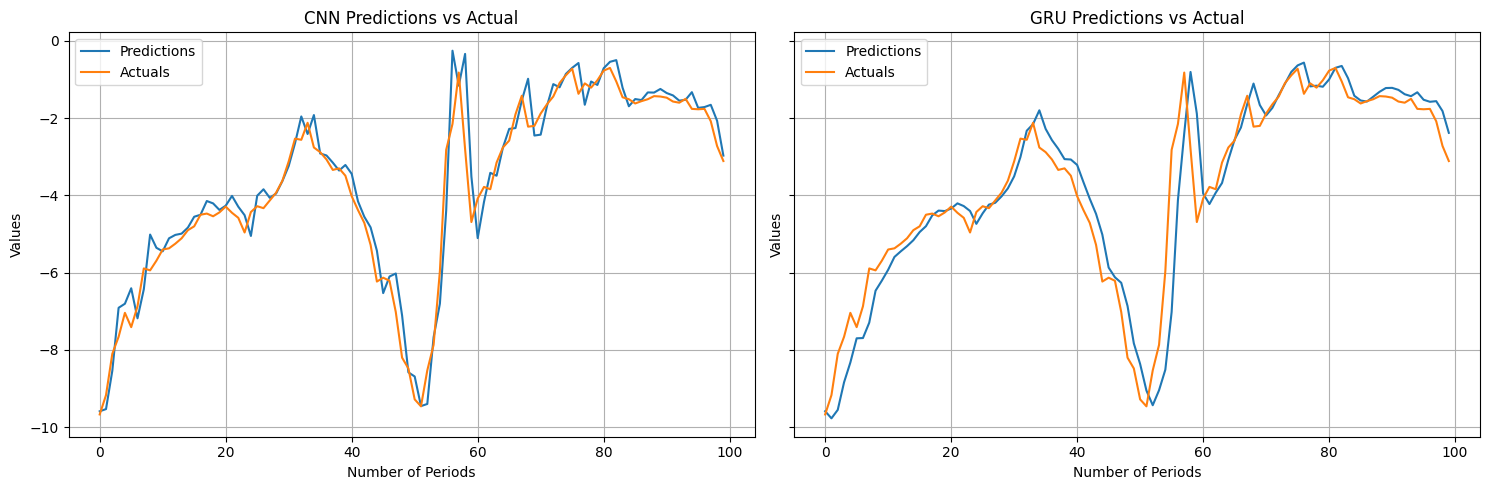

In [16]:
 f, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5)) # Specify number of plots rowise and columnwise

plot_predictions(model_cnn, x_train, y_train, axes[0], start=0, stop=100) # Train plot of CNN
plot_predictions(model_gru, x_train, y_train, axes[1], start=0, stop=100) # Train plot of GRU

# Display plot
plt.tight_layout()
plt.show()

220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


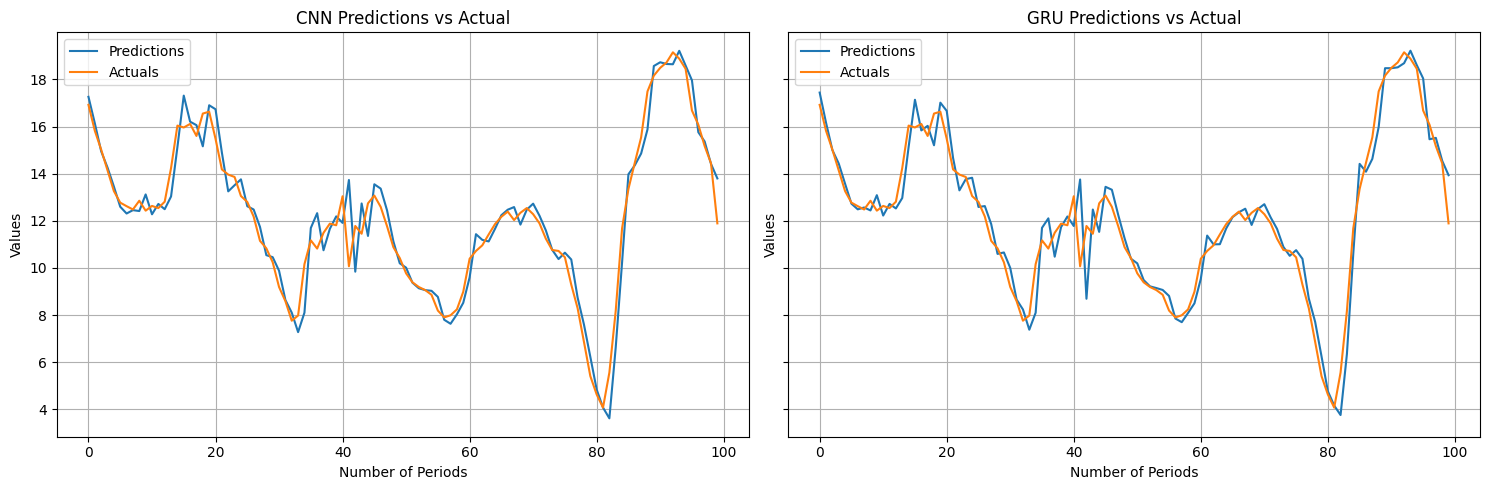

In [17]:
f, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5)) # Specify number of plots rowise and columnwise

plot_predictions(model_cnn, x_val, y_val, axes[0], start=0, stop=100) # Validation plot of CNN
plot_predictions(model_gru, x_val, y_val, axes[1], start=0, stop=100) # Validation plot of GRU

# Display plot
plt.tight_layout()
plt.show()

220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


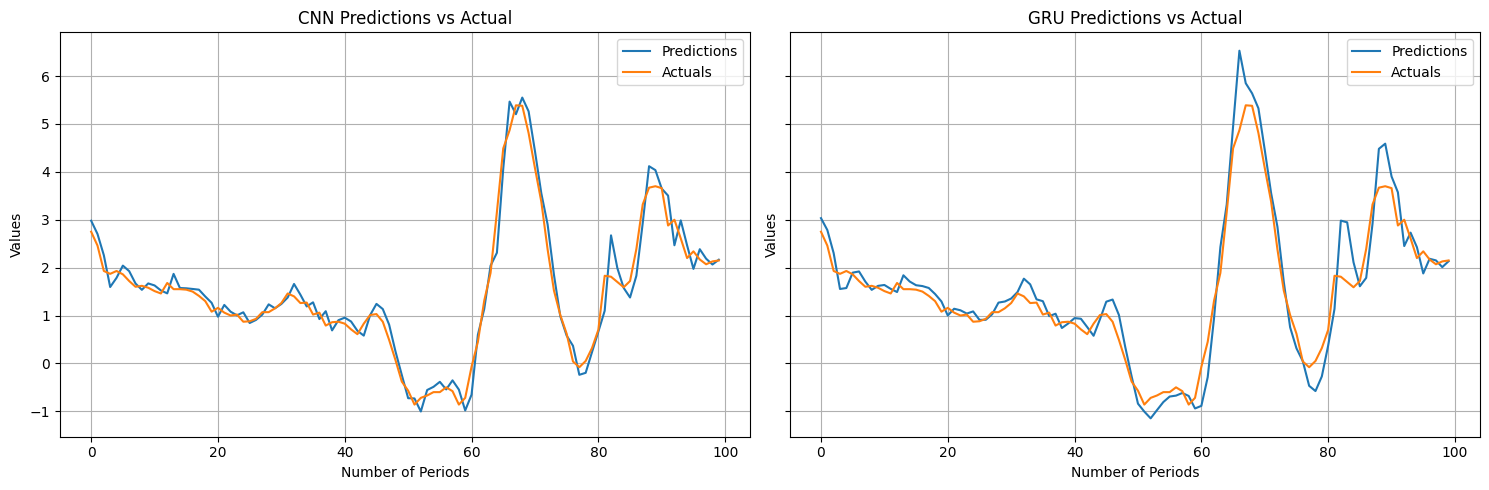

In [18]:
 f, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5)) # Specify number of plots rowise and columnwise

plot_predictions(model_cnn, x_test, y_test, axes[0], start=0, stop=100) # Test plot of CNN
plot_predictions(model_gru, x_test, y_test, axes[1], start=0, stop=100) # Test plot of GRU

# Display plot
plt.tight_layout()
plt.show()